# Task 2 Data Visualization 

## (0) Problem and Data Description

The dataset (Mushroom Classification) used in this part of the report is from https://www.kaggle.com/uciml/mushroom-classification. It contains 8124 samples of mushrooms with 23 features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

Below is the attribute Information: 
classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

All of these 23 features are categorical variables. And there is no missing data here. The aim of this part is to visualize the class of the mushrooms and separate them into edible and poisonous. Below is some exploration of our data. We can see that some features are not balanced. For example, only a few (<1%) mushrooms have spore color o(orange),u(purple),r(green) and b(buff). And this is the same for the colors of other parts of mushrooms. The unbalanced features can make our visualization of the mushrooms with rare types of features much more difficult. 

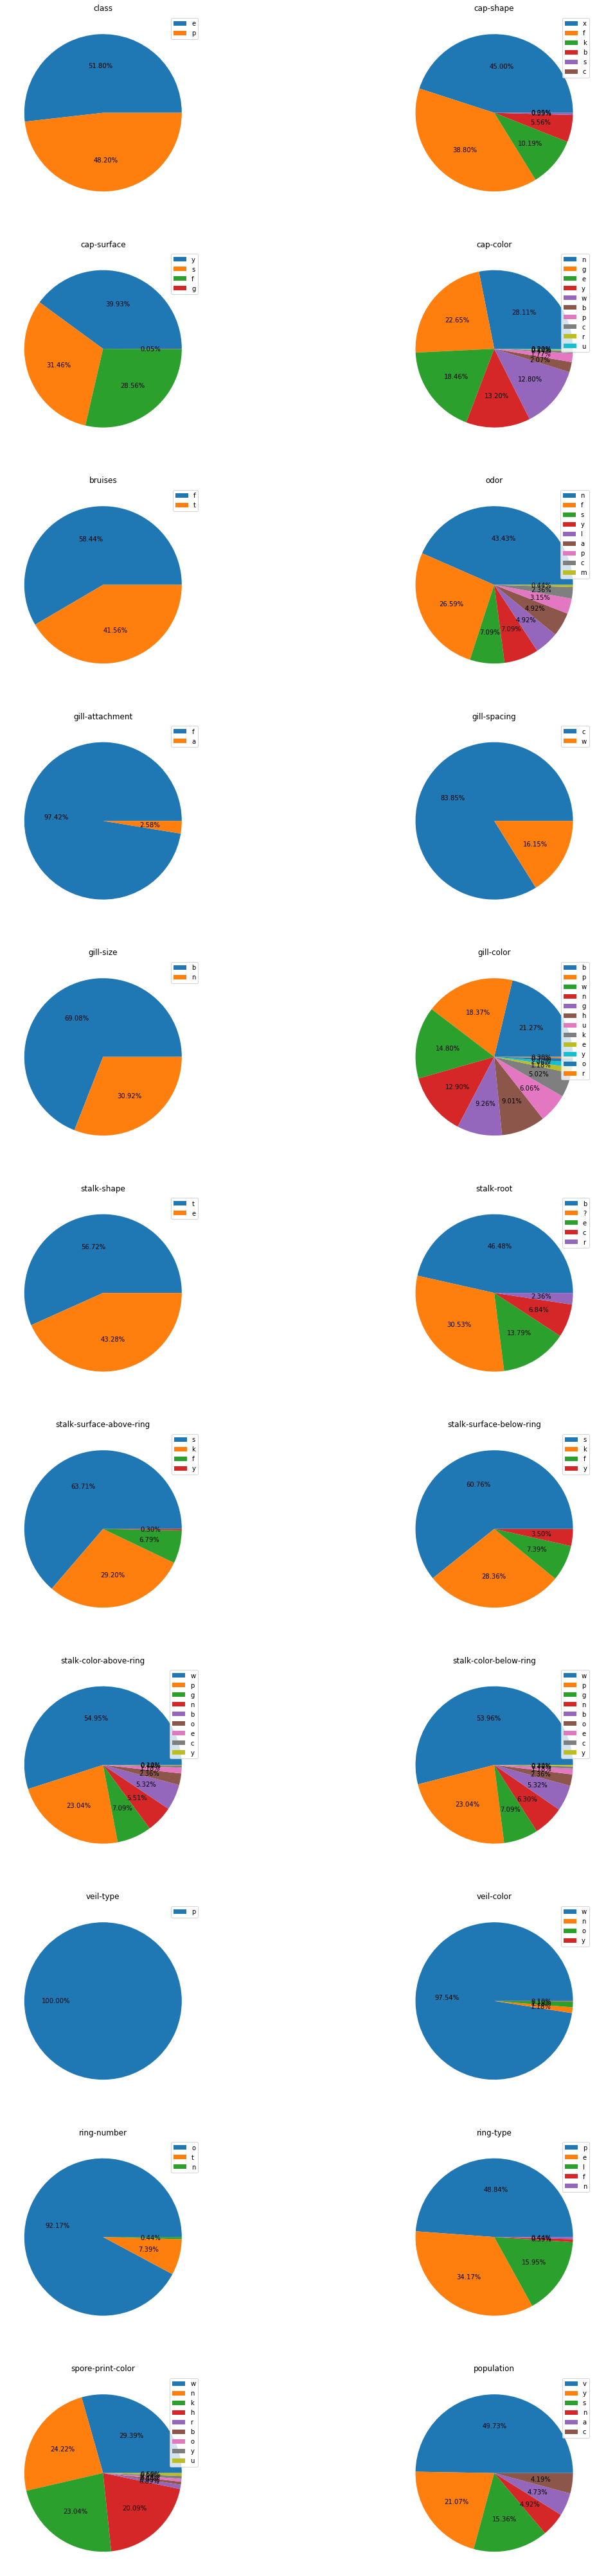

In [72]:

plt.figure(figsize=(20,80))
for i in range(0,22):
    plt.subplot(12,2,i+1)
    plt.pie(pd.value_counts(df.iloc[:,i]),autopct='%.2f%%')
    #plt.ylabel('count') 
    plt.legend(labels=list(pd.value_counts(df.iloc[:,i]).index),loc='upper right')
    plt.title(df.columns[i])
    #plt.imshow(img_test[i-1])
plt.show()

Text(0.5, 1.0, 'PCA dataset')

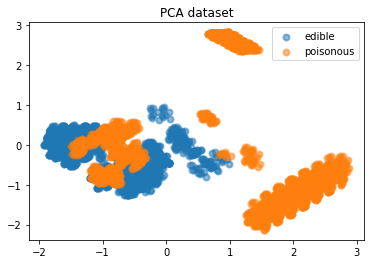

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train=pd.get_dummies(df.drop(['class'],axis=1))
X_pca=pca.fit(train).transform(train)
plt.figure()
lw = 2

for  i in range(2):
    plt.scatter(X_pca[df.iloc[:,0]== ['e','p'][i], 0], X_pca[df.iloc[:,0]== ['e','p'][i], 1], alpha=.5, lw=lw,label=['edible', 'poisonous'][i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA Mushroom Classification')

Above is the data visualization with PCA. We can see that some edible mushrooms and poisnous mushrooms do seperate successfully from each other, but at the left part of the plot, there is still many overlapping regions between these two types of mushrooms.

Text(0.5, 1.0, 't-SNE dataset')

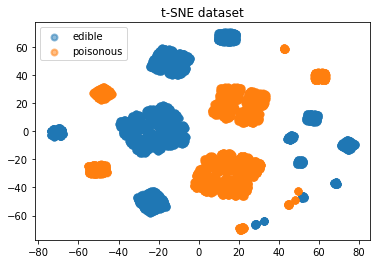

In [17]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(train)
plt.figure()
lw = 2
for  i in range(2):
    plt.scatter(X_tsne[df.iloc[:,0]== ['e','p'][i], 0], X_tsne[df.iloc[:,0]== ['e','p'][i], 1], alpha=.5, lw=lw,label=['edible', 'poisonous'][i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE Mushroom Classification')

This is Mushroom Classification with t-SNE. We can see that the two different classes of mushrooms seperate very well in the plot.There is only very few overlapping regions between the edible and poisonous mushrooms. 

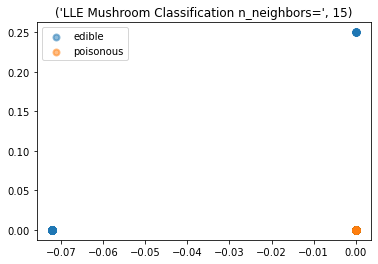

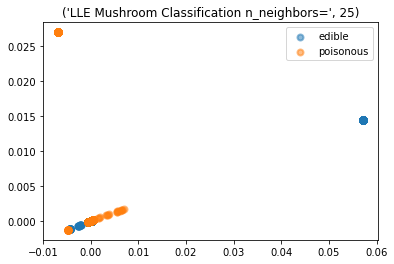

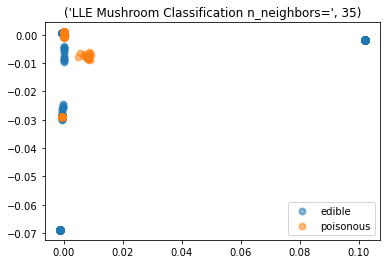

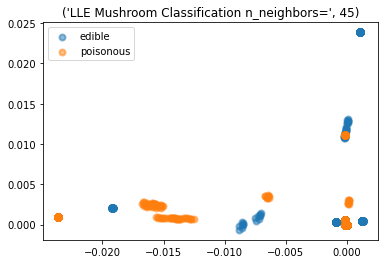

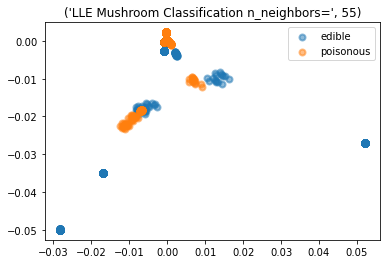

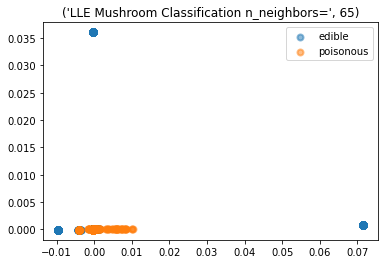

In [38]:
from sklearn.manifold import LocallyLinearEmbedding
for j in list((15,25,35,45,55,65)):
    embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=j)
    X_transformed = embedding.fit_transform(train)
    plt.figure()
    lw = 2

    for  i in range(2):
        plt.scatter(X_transformed[df.iloc[:,0]== ['e','p'][i], 0], X_transformed[df.iloc[:,0]== ['e','p'][i], 1], alpha=.5, lw=lw,label=['edible', 'poisonous'][i])
#plt.xlim((-0.0005, 0))
#plt.ylim((-0.01, 0.01))
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(('LLE Mushroom Classification n_neighbors=',j))

We have tried different number of neighbors including 15,25,35,45,55,65 for the LLE method. It seem that when n_neighbor=15, the points can seperate well from different classes. But when we zoom the plot as below, we can see that there are many points from different classes overlapping each other in a small space. So none of them can seperate the data well. There are many overlapping between the edible and poisonous mushrooms. 

Text(0.5, 1.0, 'LLE dataset')

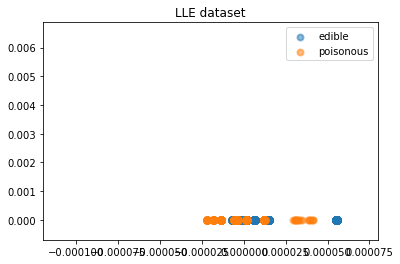

In [42]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=15)
X_transformed = embedding.fit_transform(train)
plt.figure()
lw = 2
for  i in range(2):
    plt.scatter(X_transformed[df.iloc[:,0]== ['e','p'][i], 0], X_transformed[df.iloc[:,0]== ['e','p'][i], 1], alpha=.5, lw=lw,label=['edible', 'poisonous'][i])
plt.xlim((-0.00012, 0.00008))
plt.ylim((-0.000690, 0.006875))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LLE Mushroom Classification n_neighbors=15')

In all, the best visualization method for this data is t-SNE, which can seperate the two classes of mushrooms with very few overlapping. PCA method also work well for some types of mushrooms. LLE is not suitable this data.